# Python for Machine Learning

### *Session \#6*


### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**UP/DOWN ARROWS** --> Move cursor between cells (then ENTER to start typing)

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Decision Trees

In [124]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.classifier import ConfusionMatrix, ROCAUC
from yellowbrick.model_selection import ValidationCurve

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("breast_cancer.csv", usecols=range(1, 32))

X = df.drop('diagnosis', 1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

### Warm Ups

*Type the given code into the cell below*

---
**Create a decision tree:** 
```python
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)
```

**Print tree:** 
```python
print(plot_tree(model, 
                feature_names=X.columns, 
                class_names=model.classes_, 
                filled=True))
```

[Text(390.6, 271.8, 'concave points_mean <= 0.051\ngini = 0.464\nsamples = 426\nvalue = [270, 156]\nclass = B'), Text(195.3, 163.08, 'area_se <= 38.16\ngini = 0.094\nsamples = 262\nvalue = [249, 13]\nclass = B'), Text(97.65, 54.360000000000014, 'gini = 0.032\nsamples = 246\nvalue = [242, 4]\nclass = B'), Text(292.95000000000005, 54.360000000000014, 'gini = 0.492\nsamples = 16\nvalue = [7, 9]\nclass = M'), Text(585.9000000000001, 163.08, 'concavity_worst <= 0.223\ngini = 0.223\nsamples = 164\nvalue = [21, 143]\nclass = M'), Text(488.25, 54.360000000000014, 'gini = 0.142\nsamples = 13\nvalue = [12, 1]\nclass = B'), Text(683.5500000000001, 54.360000000000014, 'gini = 0.112\nsamples = 151\nvalue = [9, 142]\nclass = M')]


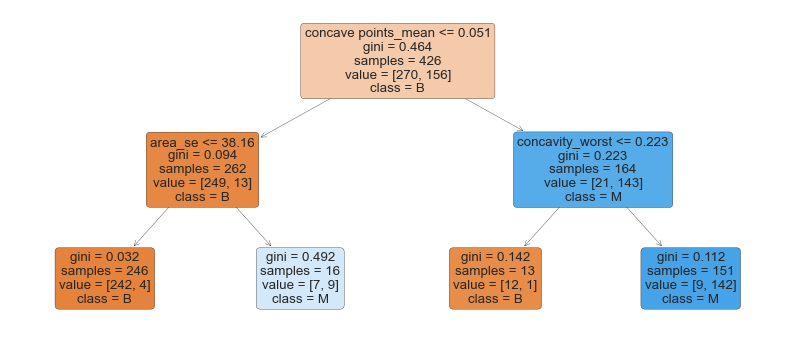

In [87]:
plt.figure(figsize=(14,6))

# Add your code below
print(plot_tree(model, 
                feature_names=X.columns, 
                class_names=model.classes_, 
                filled=True,
                rounded=True
               ))

**Show Gini importance of features:** 
```python
sorted(zip(model.feature_importances_, X.columns))
```

In [85]:
# sorted(zip(model.feature_importances_, X.columns))

### Exercises
---

**1. In the decision tree graphed above, how would the following two cases be classified?**

* concave_points_mean = 0.050
* area_se = 42
* concavity_worst = 0.5


* concave points_mean = 0.092
* area_se = 32
* concavity_worst = 0.6


*Hint: If the top line within each box is true, go left. False, go right.*

In [96]:
# M (Second leaf from left)

# M (Far-right leaf)

**2. What is the Gini impurity of the first cut? The second?**

Gini reminder: Imagine randomly choosing a datapoint, then assign class label with probability according to proportion of classes. What's the chance of misclassification?

<br>
<div style="display: flex;">
    <img src="../images/gini1.png"> 
    <img src="../images/gini2.png">
</div>

In [102]:
# FIRST IMAGE
# ------------------------
# Left side: (1/3)*(2/3) + (2/3)*(1/3) = 0.444
# Right side = (1/4)*(3/4) + (3/4)*(1/4) = 0.375

# SECOND IMAGE
# ------------------------
# Left side: (1/4)*(3/4) + (3/4)*(1/4) = 0.375
# Right side = (0)*(1) + (1)*(0) = 0.0

**3. What is the accuracy score of the decision tree above?**

**Retrain and remove the** `max_depth` **parameter. Compare the score on the training set and test sets. What is happening to the model?**

In [111]:
model.score(X_test, y_test)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

model.score(X_train, y_train)
model.score(X_test, y_test)

0.9370629370629371

**4. Use a validation curve to find where** `max_depth` **begins to become ineffective.**

Hint: `ValidationCurve()` takes model, then parameter name, then values you want to try.

/Users/rcarrington/opt/anaconda3/envs/machine_learning_bootcamp/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


0.8951048951048951

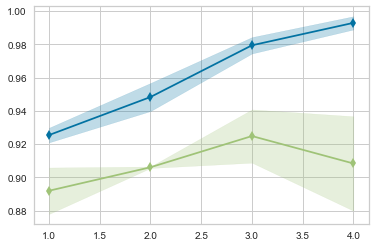

In [109]:
model_vc = ValidationCurve(model, 'max_depth', range(1,5))
model_vc.fit(X_train, y_train)

**5. Retrain the model with** `max_depth` **set to the ideal value you found.**

**Which features were most important to the decision tree?**

In [113]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

sorted(zip(model.feature_importances_, X.columns))

[(0.0, 'area_mean'),
 (0.0, 'compactness_mean'),
 (0.0, 'compactness_se'),
 (0.0, 'compactness_worst'),
 (0.0, 'concave_points_se'),
 (0.0, 'concavity_mean'),
 (0.0, 'concavity_se'),
 (0.0, 'fractal_dimension_mean'),
 (0.0, 'fractal_dimension_worst'),
 (0.0, 'perimeter_mean'),
 (0.0, 'perimeter_se'),
 (0.0, 'perimeter_worst'),
 (0.0, 'radius_se'),
 (0.0, 'radius_worst'),
 (0.0, 'smoothness_mean'),
 (0.0, 'smoothness_se'),
 (0.0, 'smoothness_worst'),
 (0.0, 'symmetry_mean'),
 (0.0, 'symmetry_se'),
 (0.0, 'symmetry_worst'),
 (0.0, 'texture_mean'),
 (0.0, 'texture_se'),
 (0.0, 'texture_worst'),
 (0.007190996931723105, 'concave_points_worst'),
 (0.010510252415214038, 'radius_mean'),
 (0.026200984358949776, 'fractal_dimension_se'),
 (0.026830601201634077, 'area_worst'),
 (0.05103825192110432, 'area_se'),
 (0.10161328926809192, 'concavity_worst'),
 (0.7766156239032828, 'concave_points_mean')]

## II. Random Forest

### Warm Ups

*Type the given code into the cell below*

---

**Create a random forest**: `model = RandomForestClassifier(n_estimators=100)`

**Feature importance:** `model.feature_importances_`

**Access internal decision trees:** `model.estimators_`

**Grid Search:** 
```python
params = {'n_estimators': range(100, 160, 10)}
grid = GridSearchCV(model, params).fit(X, y)
grid.best_params_
```

### Exercises
---

**1. Redo the validation curve exercise with your RandomForest classifier.** 

**Do deeper trees cause overfitting?**

/Users/rcarrington/opt/anaconda3/envs/machine_learning_bootcamp/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x11cf85fd0>,
                cv=None, groups=None, logx=False, model=None, n_jobs=1,
                param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                pre_dispatch='all', scoring=None)

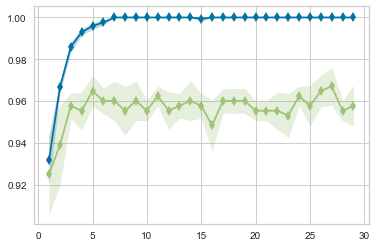

In [141]:
model_vc = ValidationCurve(RandomForestClassifier(), 'max_depth', range(1,30))
model_vc.fit(X_train, y_train)

**3. The** `class_weight` **parameter takes a dictionary of classes, and changes how important each class is to the model**

**Try setting it to** `{'B': 10}` **to make the malignant cases 10x as important. Use a** `ConfusionMatrix` **visualizer to see how this affects the type of errors the model makes**

/Users/rcarrington/opt/anaconda3/envs/machine_learning_bootcamp/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


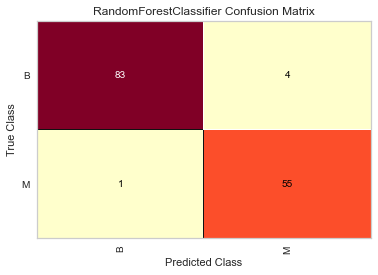

In [178]:
model_cm = ConfusionMatrix(RandomForestClassifier(class_weight={'B': 10}))
model_cm.fit(X_train, y_train)
model_cm.score(X_test, y_test)
model_cm.show()

**4. Further parameters to** `RandomForestClassifier` **are:**

    * max_depth -- # of layers in decision trees
    * max_features -- # of columns used at each split
    
**Use grid search to optimize for these hyperparameters**

Note: The more combinations you try, the longer this will run! Start with trying only a few.

In [180]:
params = {'max_depth': range(10, 40, 4),
          'max_features': range(6, 20, 4)}
grid = GridSearchCV(model, params).fit(X, y)
grid.best_params_

{'max_depth': 10, 'max_features': 14}

**5. A major benefit of random forest models is that they perform automatic feature selection.**

**Run the code below to add 10 columns of random data to your dataset. Re-train your model and score it.**

In [127]:
random_df = pd.DataFrame(np.random.randint(0,100,size=(len(df), 10)), 
                         columns=[f"random_{i}" for i in range(10)])

big_df = pd.concat([df, random_df], axis=1)
X = df.drop('diagnosis', 1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [129]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.958041958041958

## III. Final Practice: Start to Finish

### Exercises
---

**1. Let's bring it all together! Here you will apply all the individual skills you've learned to a raw dataset.** 

**You will need to:** 

* Explore the data
* Select an appropriate model
* Split the data into X, y and train/test
* Handle null values, if present
* Do feature engineering
* Use appropriate evaluation methods
* Optimize hyperparameters

In [188]:
# "target" column is what we want to predict
# 0 = Bad Car, 3 = Very Good Car

cars = pd.read_csv("cars.csv")

In [187]:
# "price" column is what we want to predict

diamonds = pd.read_csv("diamonds.csv")